# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [3]:
# Inspect the shapes of the datasets
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [4]:
# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(f'After one-hot encoding: {y_train[0]}')


Before one-hot encoding: 9
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


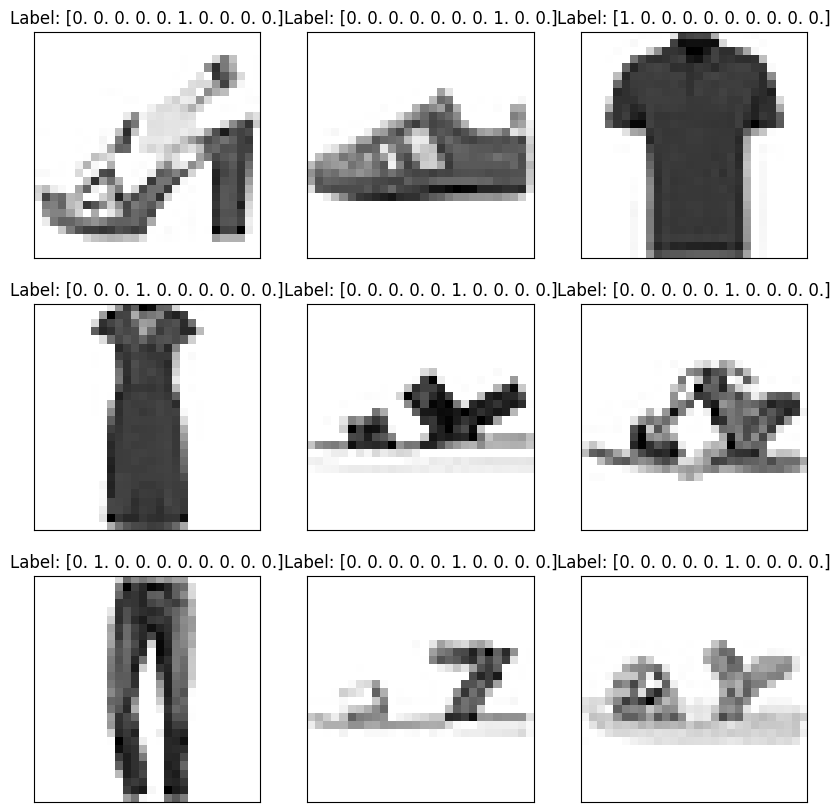

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# Verify the data looks as expected
# Selecting 9 random indices
random_indices = np.random.choice(len(X_train), 9, replace=False)

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {y_train[random_indices[i]]}")
    
    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here** The resolution is low, but still clear enough for most of the items to be able to distinquish between them or assign what it is, except when it items are very similar like the two at bottom right.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()
# You can use `model.add(<layer>)` to add layers to the model
model.add(Flatten(input_shape=(28,28)))
#model.add(Dense(10, activation='softmax'))
model.add(Dense(10,))
# Compile the model using `model.compile()`
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# Train the model with `model.fit()`
model.fit(
    X_train, # Training data
    y_train, # Training labels
    epochs=10, # Number of epochs, running 5 times
    batch_size=32, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
)
# Evaluate the model with `model.evaluate()`
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

c:\Users\cheki\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1462 - loss: 8.8570 - val_accuracy: 0.1013 - val_loss: 7.2807
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0989 - loss: 8.0460 - val_accuracy: 0.1013 - val_loss: 8.3446
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0998 - loss: 9.1238 - val_accuracy: 0.1013 - val_loss: 9.0621
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1006 - loss: 8.9721 - val_accuracy: 0.1013 - val_loss: 8.8494
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1010 - loss: 8.9544 - val_accuracy: 0.1013 - val_loss: 8.8762
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1027 - loss: 8.8615 - val_accuracy: 0.1013 - val_loss: 8.9097
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1008 - loss: 8.8753 - val_accuracy: 0.1013 - val_loss: 8.9392
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1006 - loss: 8.8363 - 

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,852 (30.68 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?
**Your answer here**
WIth the linear model with no activiation, the accuracy is low. if we put epoch=5, it is about 10% and increasing it to 10, it increases to 21.45% and the loss is still high. It means that there are features in the system that are non-linear and the model cannot learn them.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [7]:
from keras.layers import Conv2D
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from tensorflow.keras.utils import to_categorical
# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model2 = Sequential()
model2.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))
#compile
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model
model2.fit(
    X_train, # Training data
    y_train, # Training labels
    epochs=10, # Number of epochs, running 5 times
    batch_size=32, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
)
# Evaluate the model
loss, accuracy = model2.evaluate(X_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/10


c:\Users\cheki\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6462 - loss: 1.0752 - val_accuracy: 0.7900 - val_loss: 0.5781
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8070 - loss: 0.5375 - val_accuracy: 0.8182 - val_loss: 0.5089
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8295 - loss: 0.4888 - val_accuracy: 0.8394 - val_loss: 0.4516
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8387 - loss: 0.4628 - val_accuracy: 0.8295 - val_loss: 0.4740
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8517 - loss: 0.4265 - val_accuracy: 0.8339 - val_loss: 0.4564
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8573 - loss: 0.4175 - val_accuracy: 0.8607 - val_loss: 0.4024
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8621 - loss: 0.4016 - val_accuracy: 0.8660 - val_loss: 0.3838
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8657 - loss: 0.3884 - val_accura

In [18]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,412 (212.55 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?
**Your answer here**
Yes, it significantly performed better, the accuracy is 86.63% with the baseline model it was about 20%. It must be due to non-linear activation that helps to detect and learn non-linear fearures or relations and the convolutional layer that helped the model learn spatial features better.

# 4. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [11]:
from keras.layers import Conv2D
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
 
#getting the data again
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values (0–1 range)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Add the channel dimension for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)# Reshape the data to include the channel dimension


result_1={} # for loss
result_2={} # for accuracies 
histories = {} # store training history
def build_model3(filters):
    model3 = Sequential()
    model3.add(Conv2D(filters, (3,3), activation='relu', input_shape=(28,28,1)))
    model3.add(MaxPooling2D(pool_size=(2,2)))

    model3.add(Flatten())
    model3.add(Dense(10, activation='softmax'))
    #compile
    model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model3
# A. Test Hyperparameters
# loop for changing the number of filters
for x in [16, 32, 64, 128]:
    model3=build_model3(filters=x)
    # Train the model
    history = model3.fit(
    X_train, # Training data
    y_train, # Training labels
    epochs=5, # Number of epochs, running 5 times
    batch_size=32, # Nbatch size
    validation_split=0.2) # Use 20% of the data for validation
    
    # Evaluate the model
    loss, accuracy = model3.evaluate(X_test, y_test)
    result_1 [x]= loss
    result_2 [x]= accuracy
    histories[x] = history




Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6473 - loss: 1.0975 - val_accuracy: 0.8138 - val_loss: 0.5357
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8149 - loss: 0.5220 - val_accuracy: 0.8210 - val_loss: 0.5058
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8350 - loss: 0.4766 - val_accuracy: 0.8427 - val_loss: 0.4551
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8463 - loss: 0.4379 - val_accuracy: 0.8539 - val_loss: 0.4215
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8529 - loss: 0.4206 - val_accuracy: 0.8584 - val_loss: 0.4059
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8614 - loss: 0.4145
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6475 - loss: 1.0734 - val_accuracy: 0.7991 - val_loss: 0.5557
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8056 - loss: 0.5457 - val_accuracy: 0.8030 - val_loss: 0.5354
Epoch 3/5
1500/1500 ━━

In [19]:
model3.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │       216,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217,612 (850.05 KB)

 Trainable params: 217,610 (850.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [12]:
print (f" ---Table of the results with different numer of filters----")
print("     Losses:      ", result_1)
print("     Accuracies:  ", result_2)

 ---Table of the results with different numer of filters----
     Losses:       {16: 0.4225698709487915, 32: 0.4280495047569275, 64: 0.47228384017944336, 128: 0.4461428225040436}
     Accuracies:   {16: 0.8532999753952026, 32: 0.8507000207901001, 64: 0.8352000117301941, 128: 0.840399980545044}


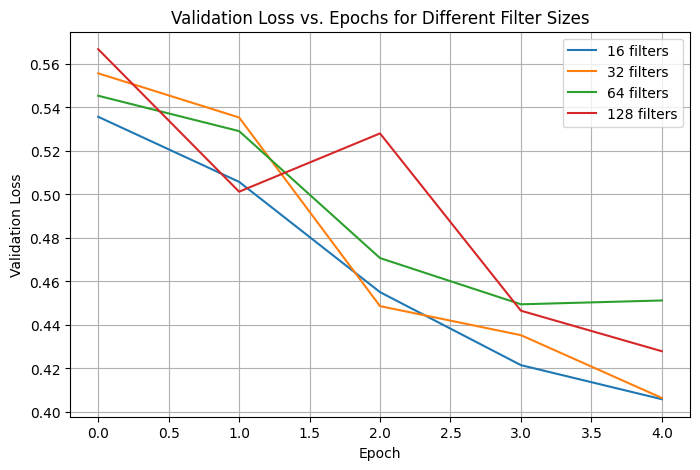

In [24]:
plt.figure(figsize=(8,5))
for f, hist in histories.items():
    plt.plot(hist.history['val_loss'], label=f"{f} filters")
plt.title("Validation Loss vs. Epochs for Different Filter Sizes")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# B. Test presence or absence of regularization
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
result_3={} # for accuracies without dropout
result_4={} # for accuracies with dropout

def build_model4(filters, dropout=False, p=0.5):
    model4 = Sequential()
    model4.add(Conv2D(filters, (3,3), activation='relu', input_shape=(28,28,1)))
    model4.add(MaxPooling2D(pool_size=(2,2)))
    model4.add(Flatten())
    if dropout:
        model4.add(Dropout(p))
    model4.add(Dense(10, activation='softmax'))
    model4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model4

# Wihtout Dropout or Dropout OFF
model4 = build_model4(filters=32, dropout=False)
model4.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
loss_off, acc_off = model4.evaluate(X_test, y_test, verbose=0)
print(f"Dropout=False → Accuracy={acc_off*100:.2f}%")
result_3["off"] = acc_off

for x in [0.2, 0.5, 0.7]:
    # With Dropout ON
    model5 = build_model4(filters=64, dropout=True, p=x)
    model5.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
    loss_on, acc_on = model5.evaluate(X_test, y_test)
    print(f"Dropout=True → Accuracy={acc_on*100:.2f}%")
    result_4 [f"dropout= {x}"]= acc_on

Dropout=False → Accuracy=84.88%
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6543 - loss: 1.0656 - val_accuracy: 0.8087 - val_loss: 0.5402
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8045 - loss: 0.5537 - val_accuracy: 0.8236 - val_loss: 0.4974
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8235 - loss: 0.5074 - val_accuracy: 0.8422 - val_loss: 0.4512
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8365 - loss: 0.4689 - val_accuracy: 0.8496 - val_loss: 0.4288
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8493 - loss: 0.4392 - val_accuracy: 0.8539 - val_loss: 0.4134
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8548 - loss: 0.4222
Dropout=True → Accuracy=85.03%
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6318 - loss: 1.0957 - val_accuracy: 0.7940 - val_loss: 0.5620
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7868 - loss: 0

In [22]:
print (f" ---Table of the results with different regularizations----")
print("Without dropout:", result_3)
print("With dropout (by rate):", result_4)

 ---Table of the results with different regularizations----
Without dropout: {'off': 0.848800003528595}
With dropout (by rate): {'dropout= 0.2': 0.8503000140190125, 'dropout= 0.5': 0.855400025844574, 'dropout= 0.7': 0.8521000146865845}


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here** 
Adding more filters slightly improved the accuracies and reduced losses, there is marginal change going from 16 to 128, at epoch 4, the graph shows highest loss for 64, thus 32 filter is optimum.
with dropout and incresing the rate from 0.2 to 0.7, the accuracy increased from 84.89% to 85.37% with p=0.7
The best performing configuration I tested till now, has been using epoch 5, 32 filters with dropout (p=0.7), balancing accuracy and computational efficiency.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Final model wih the best hyperparameters and regularization (from Section 4A&B)
final_model = Sequential()
final_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
final_model.add(MaxPooling2D(pool_size=(2,2)))
final_model.add(Flatten())
final_model.add(Dropout(0.7))  
final_model.add(Dense(10, activation='softmax'))

final_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train on training set 
final_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


loss_final, acc_final = final_model.evaluate(X_test, y_test)
print(f"Final model → Loss={loss_final:.2f}, Accuracy={acc_final*100:.2f}%")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6047 - loss: 1.1150
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7765 - loss: 0.6181
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8085 - loss: 0.5320
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8267 - loss: 0.4894
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8372 - loss: 0.4622
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8460 - loss: 0.4378
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8486 - loss: 0.4270
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8594 - loss: 0.4052
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8566 - loss: 0.4046
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8640 - loss: 0.3923
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8783 - loss: 0.3570
Final model → Loss=0.36, Accuracy=87.58%


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**

Comparing to the values we achieved in section 2,3 and 4, it is improved. 
The accuracy reached to 87.58% for the final CNN model which is significantely higher than section 2 baseline linear mode (~20%) and slightly better than CNN in section 3 (86.63%). 
The loss is slightly less 0.36 vs previous 0.37, showing a better fit.
So the conclusion is the use of convolutional layers and adding dropout regularization, helps prevent overfitting and improves robustness and capturing spatial features by the model.
If we wnant to furthur test the improvement, adding different and more layers for example convolutional layers would be a good option. Also testing different optimizers would be beneficial as well. Ingeneral uncreasing the number of epoch should help the model to learn better, the numner I used is quite small.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.